# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

It describes SAT scores over different states.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

No. At least a test time column should be included. And the meaning of each column is vague.

# 3. Create a data dictionary for the dataset.

In [3]:
import pandas
scores=pandas.read_csv('sat_scores.csv')
states=scores.State.values
rate=scores.Rate.values
verbal=scores.Verbal.values
math=scores.Math.values
scores.drop(51, inplace=True)
variable={'Description': ['Average Math Scores', 'Participant Rate','States', 'Average Verbal Scores'], 'Data Type': scores.dtypes, 'Mean': scores.mean()}
datadict=pandas.DataFrame(variable)
datadict.to_csv('data dictionary.csv')

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [5]:
import csv
scorelist=[]
#with open('sat_scores.csv', 'rb') as inputdata:
with open('sat_scores.csv') as inputdata:
    filelist=csv.reader(inputdata)
    for row in filelist:
        scorelist.append(row)

##### 5. Print the data

In [6]:
print(scores)

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [7]:
labels=scores.index
scores.reset_index(inplace=True)

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [8]:
states=scores.State.values
statename=list(states)

##### 8. Print the types of each column

In [9]:
scores.dtypes

index      int64
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
mydict_rate=pandas.Series(scores.Rate.values, index=scores.State.values).to_dict()
mydict_verbal=pandas.Series(scores.Verbal.values, index=scores.State.values).to_dict()
mydict_math=pandas.Series(scores.Math.values, index=scores.State.values).to_dict()
mydict=dict([(states, [mydict_rate[states], mydict_verbal[states], mydict_math[states]]) for states in mydict_rate])

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
columndict={'Rate': list(rate), 'Verbal': list(verbal), 'Math': list(math)}
columndict

{'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561,
  580,
  577,
  559,
  562,
  567,
  577,
  564,
  

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [9]:
print('max rate: ', max(rate))
print 'min rate: ', min(rate)
print 'max verbal score: ', max(verbal)
print 'min verbal score: ', min(verbal)
print 'max math score: ', max(math)
print 'min math score: ', min(math)

max rate:  82
min rate:  4
max verbal score:  593
min verbal score:  482
max math score:  603
min math score:  439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [10]:
import numpy
lst=[rate, verbal, math]
def func():
    sd=[numpy.std([y for y in x]) for x in lst]
    return sd
print func()

[27.037996494523586, 32.915094961603266, 35.666996164305949]


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

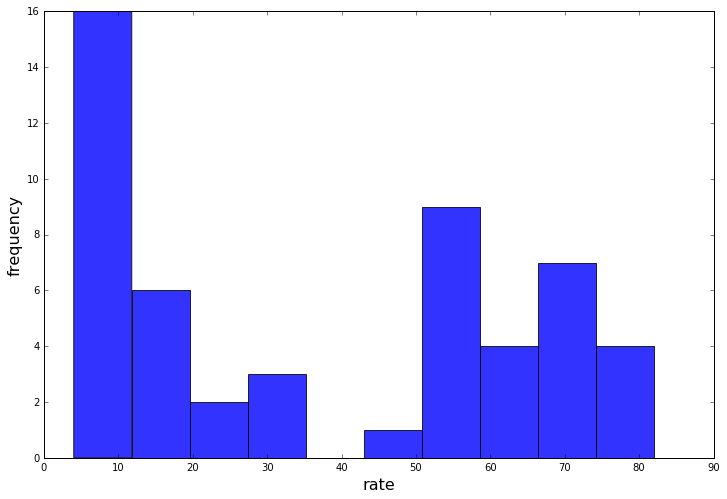

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(12,8))
axes=fig.gca()
axes.hist(rate, 10, color='blue', alpha=0.8)
axes.set_xlabel('rate', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)
plt.show()

##### 15. Plot the Math distribution

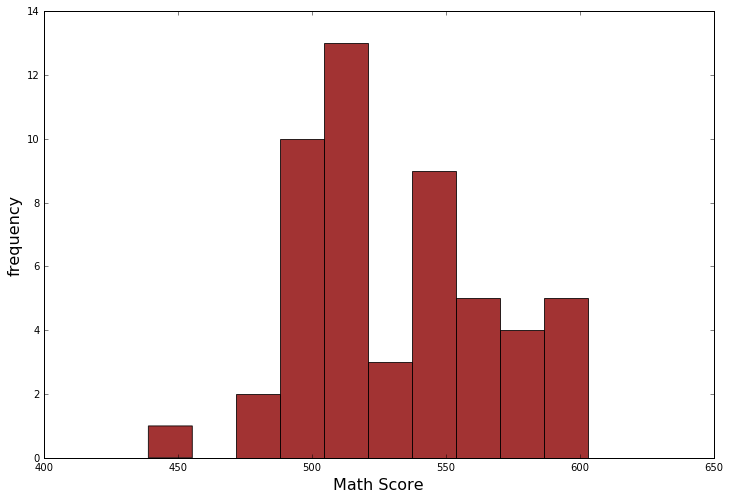

In [12]:
fig=plt.figure(figsize=(12,8))
axes=fig.gca()
axes.hist(math, 10, color='darkred', alpha=0.8)
axes.set_xlabel('Math Score', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)
plt.show()

##### 16. Plot the Verbal distribution

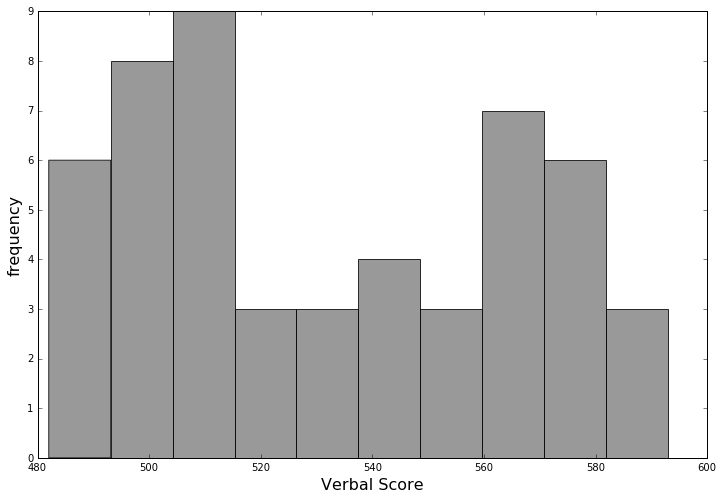

In [13]:
fig=plt.figure(figsize=(12,8))
axes=fig.gca()
axes.hist(verbal, 10, color='grey', alpha=0.8)
axes.set_xlabel('Verbal Score', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)
plt.show()

##### 17. What is the typical assumption for data distribution?

As the sample size gets larger, the dist of sample means approaches normal.

##### 18. Does that distribution hold true for our data?

Cannot tell. The disribution graphs do not seem like normal. For rate, not sure if it's a mean number. For test scores, maybe it is because the sample size is not large enough.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

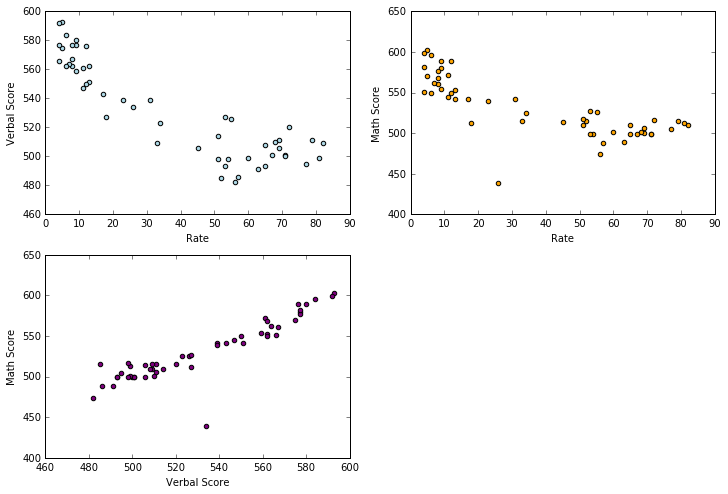

In [14]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax1.scatter(rate, verbal, c='lightblue')
ax2.scatter(rate, math, c='orange')
ax3.scatter(verbal, math, c='purple')
ax1.set_xlabel('Rate')
ax1.set_ylabel('Verbal Score')
ax2.set_xlabel('Rate')
ax2.set_ylabel('Math Score')
ax3.set_xlabel('Verbal Score')
ax3.set_ylabel('Math Score')

##### 20. Are there any interesting relationships to note?

A generally negative correlation between rate and test score, and a positive correlation between verbal and math score. 

##### 21. Create box plots for each variable. 

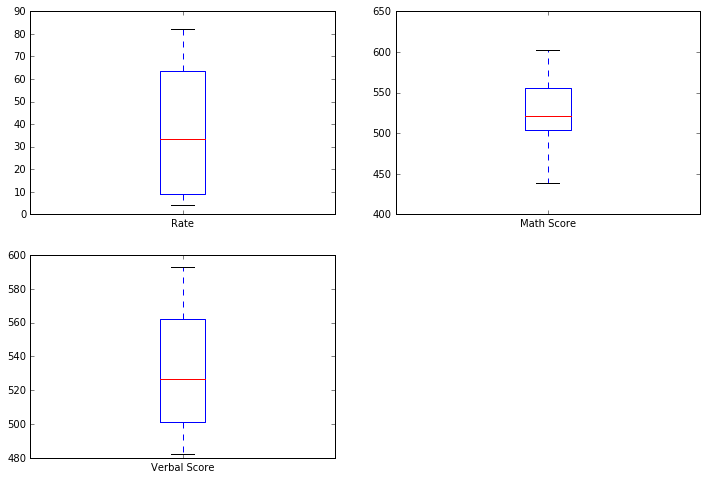

In [15]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax1.boxplot(rate)
ax2.boxplot(math)
ax3.boxplot(verbal)
ax1.set_xticklabels(['Rate'])
ax2.set_xticklabels(['Math Score'])
ax3.set_xticklabels(['Verbal Score'])